- Day 47 : 21/04/08
- https://www.kaggle.com/ash316/novice-to-grandmaster

# Novice to Grandmaster

## Introduction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import base64
import io
from imageio import imread
import codecs
from IPython.display import HTML
from matplotlib_venn import venn2
from subprocess import check_output

In [2]:
response = pd.read_csv('../input/multipleChoiceResponses.csv',encoding='ISO-8859-1')

In [3]:
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Some Basic Analysis

In [4]:
print('The total number of respondents:',response.shape[0])
print('Total number of Countries with respondents:',response['Country'].nunique())
print('Country with highest respondents:',response['Country'].value_counts().index[0],'with',response['Country'].value_counts().values[0],'respondents')
print('Youngest respondent:',response['Age'].min(),' and Oldest respondent:',response['Age'].max())

The total number of respondents: 16716
Total number of Countries with respondents: 52
Country with highest respondents: United States with 4197 respondents
Youngest respondent: 0.0  and Oldest respondent: 100.0


정말일까? 가장 나이가 어린 응답자가 한 살도 안 되었고, 가장 나이가 많은 사람이 100세다. 이것은 가짜 응답일 수도 있다.

### Gender Split

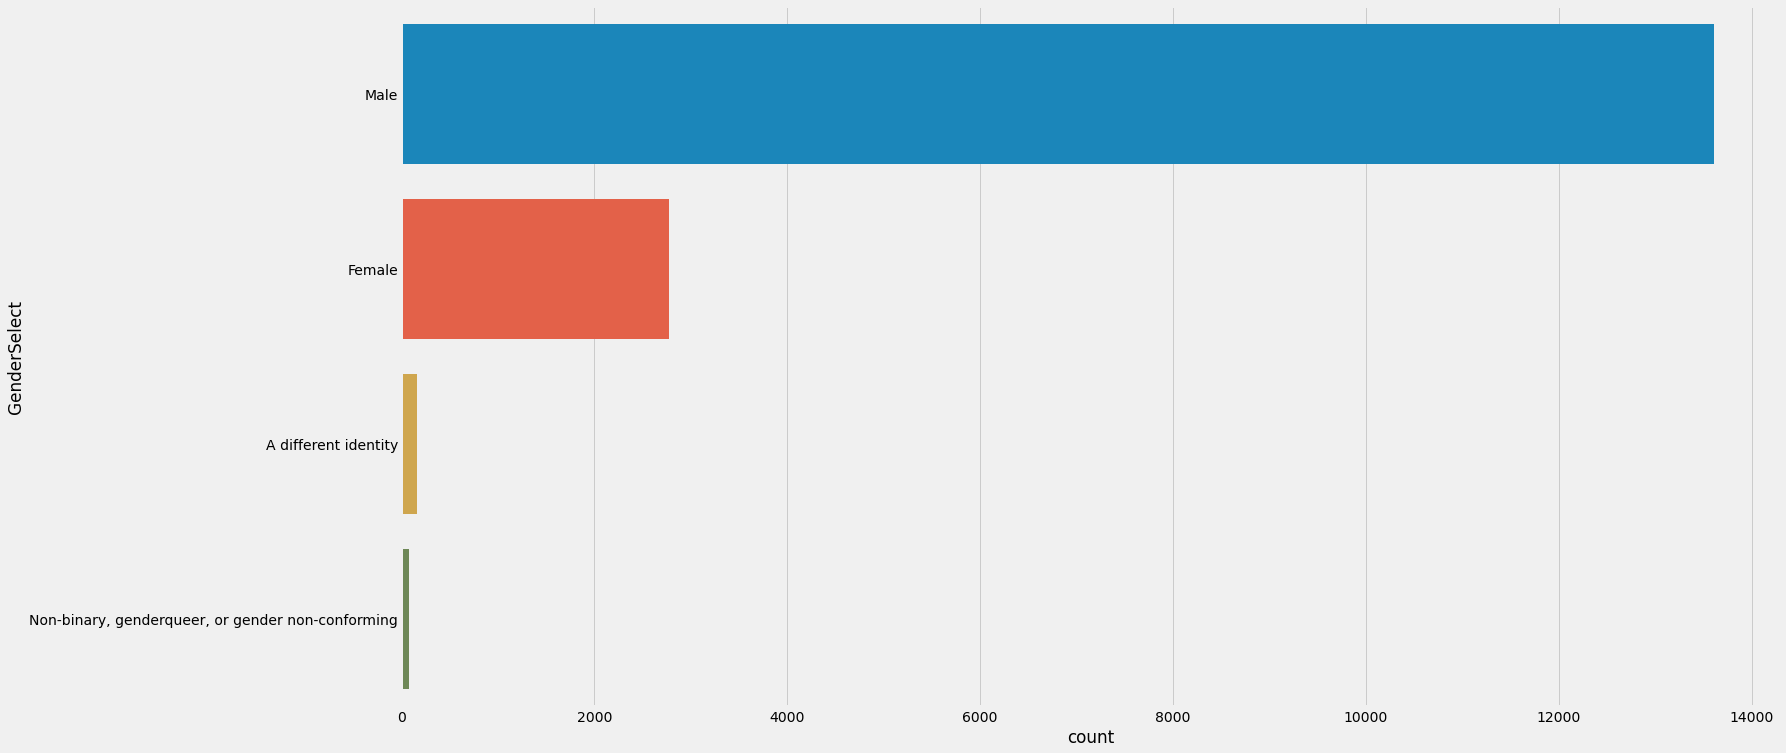

In [5]:
plt.subplots(figsize=(22,12))
sns.countplot(y=response['GenderSelect'], order=response['GenderSelect'].value_counts().index)
plt.show()

그래프에서 여성에 비해 남성 응답자가 훨씬 많다는 것을 분명히 볼 수 있다.

### Respondents By Country

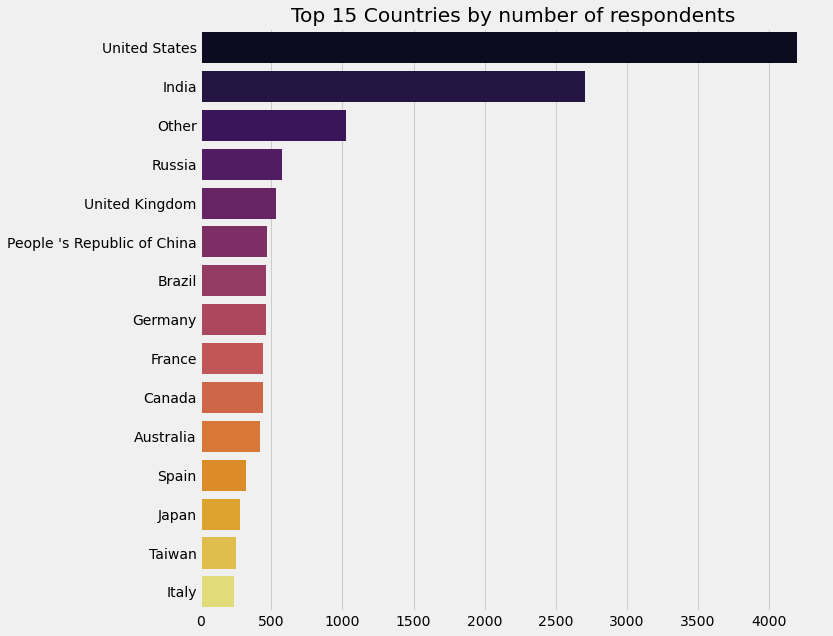

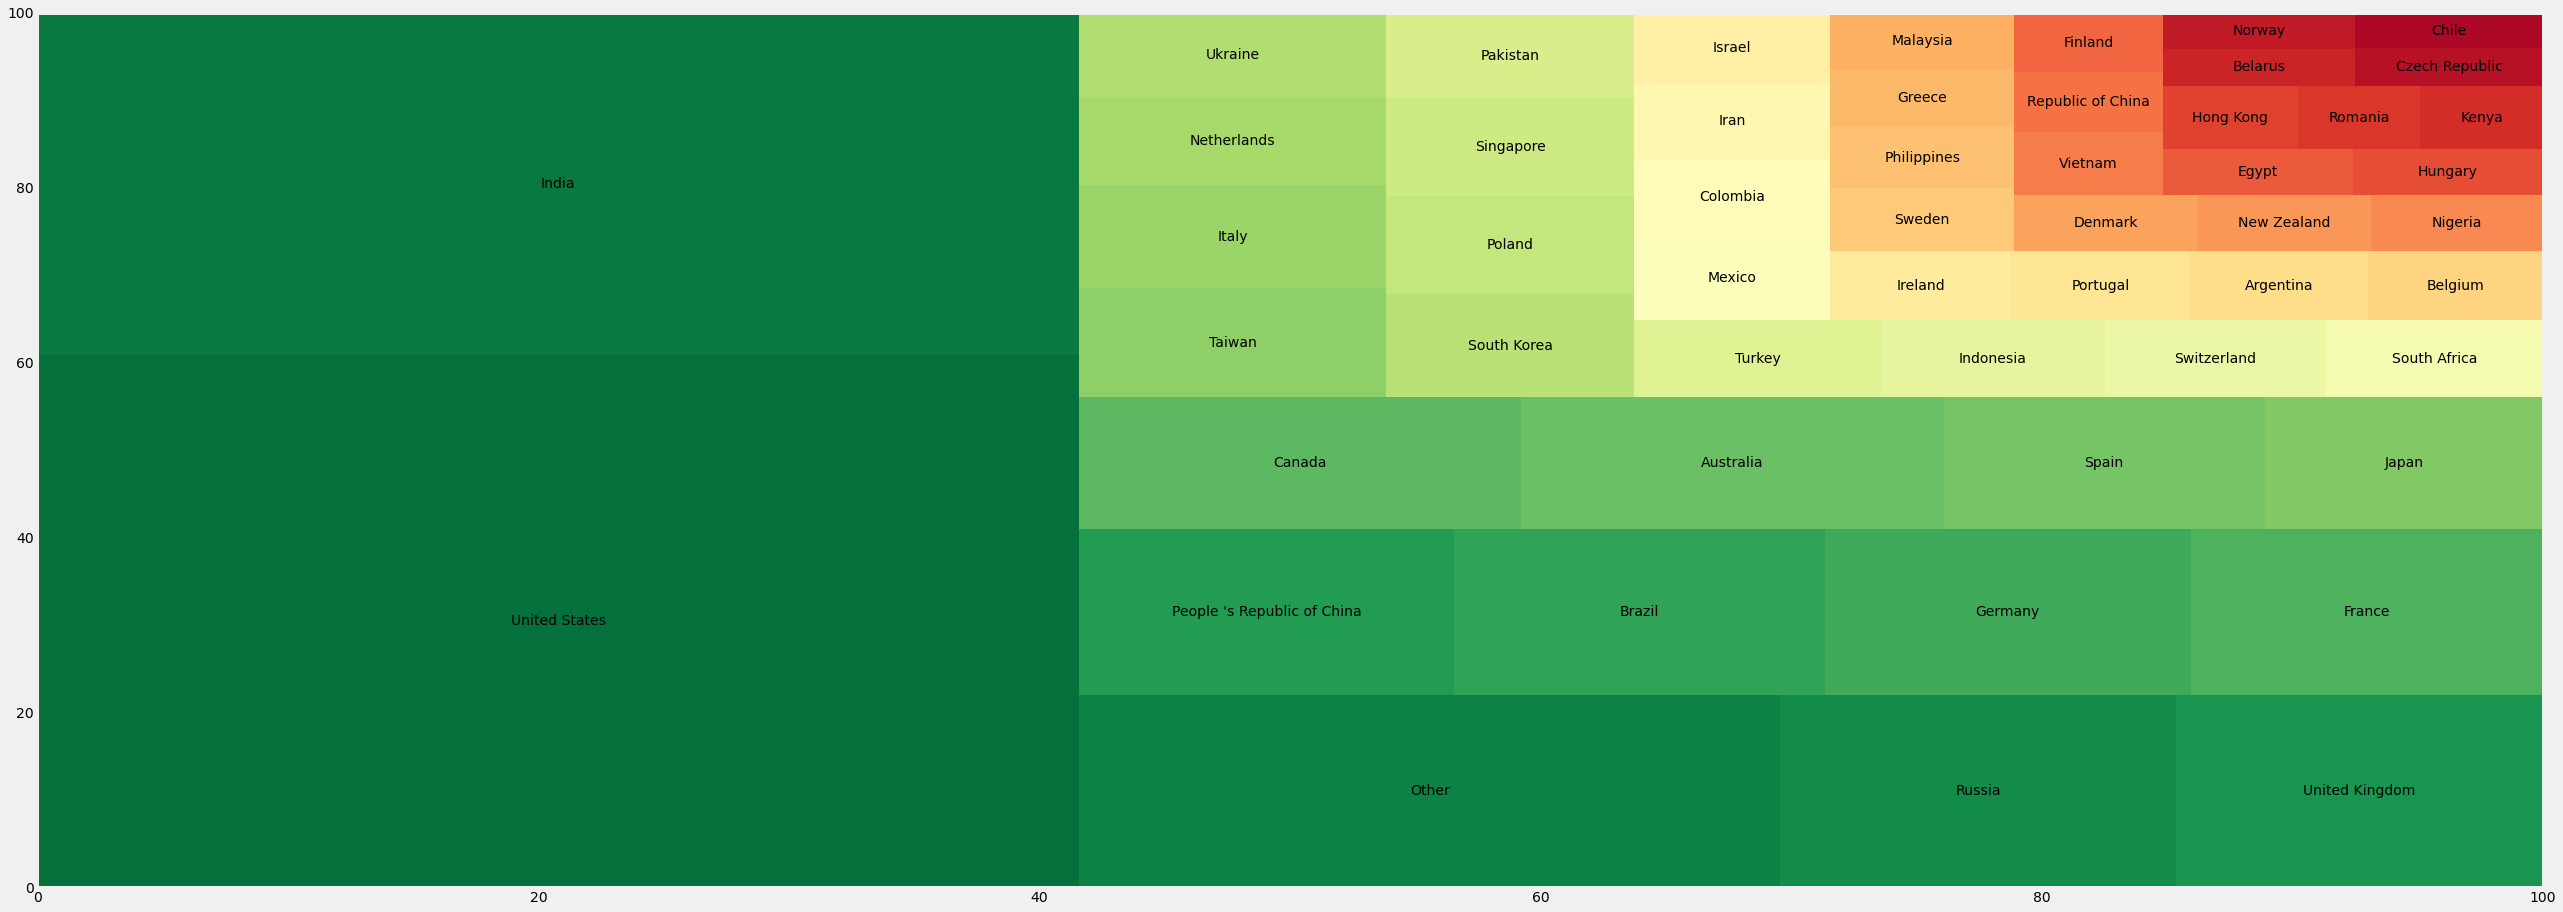

In [6]:
resp_coun = response['Country'].value_counts()[:15].to_frame()
sns.barplot(resp_coun['Country'], resp_coun.index, palette='inferno')
plt.title('Top 15 Countries by number of respondents')
plt.xlabel('')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

tree = response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values, label=tree.index, color=sns.color_palette('RdYlGn_r', 52))
plt.rcParams.update({'font.size':20})
fig = plt.gcf()
fig.set_size_inches(40,15)
plt.show()

미국과 인도는 전체 응답자 중 약 1/3을 차지한다. 칠레는 응답자 수가 가장 적다. 이 그래프는 Kaggle 사용자의 대다수가 미국과 인도 출신이라고 말할 수 있을 정도로 충분한가? Kaggle의 총 사용자는 100만 명 이상이고 응답자 수는 1만6천 명에 불과하기 때문에 그렇지 않다.

### Compensation

데이터 사이언티스트는 가장 높은 급여를 받는 사람 중 하나다. 조사원이 뭐라고 하는지 확인해보자.

In [7]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')

rates=pd.read_csv('../input/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


터무니 없다. 심지어 많은 나라의 GDP보다 더 크다. 거짓 응답의 또 다른 예시다. 최저 급여는 학생의 경우일 수 있다. 급여의 중위수는 데이터 사이언티스트가 급여 혜택이 좋음을 알 수 있다.

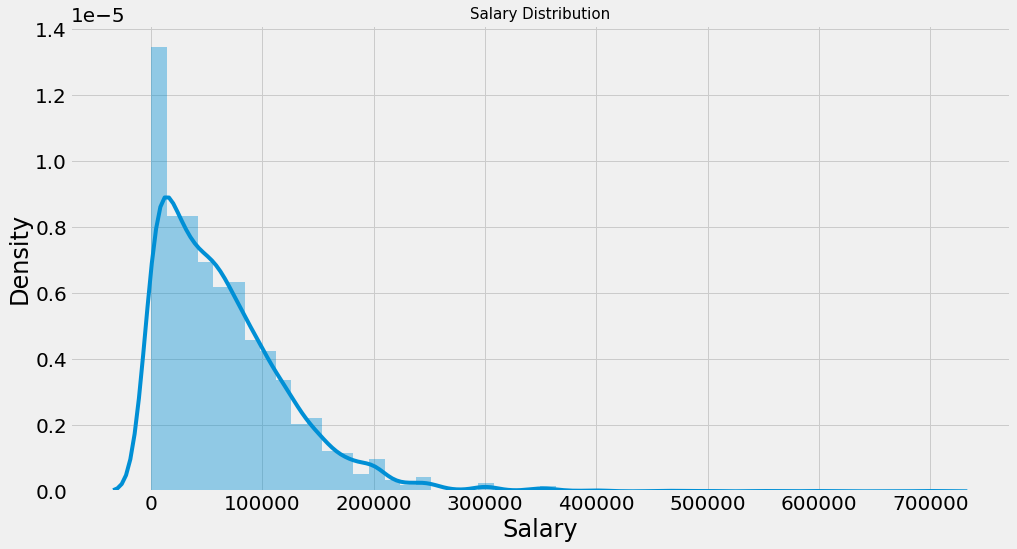

In [8]:
plt.subplots(figsize=(15,8))
salary = salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution', size=15)
plt.show()

#### compensation by Country

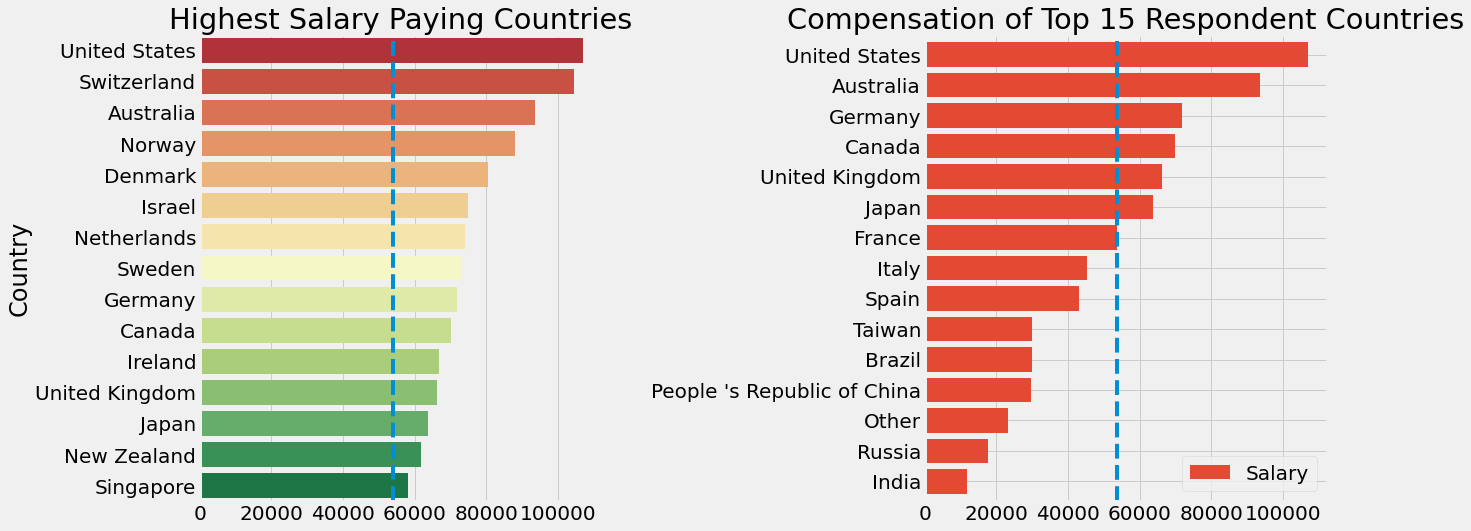

In [9]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')

max_coun = salary.groupby('Country')['Salary'].median().to_frame()
max_coun = max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

좌측 그래프는 급여 중위수의 상위 15개국을 보여준다. 이러한 국가들이 전체 데이터셋의 급여 중위수보다 더 많은 급여를 제공하고 있음을 볼 수 있다. 마찬가지로 우측 그래프는 응답자 수의 상위 15개국의 급여 중위수를 보여준다. 인도는 응답자 수가 두 번째로 높지만 급여 중위수는 그래프에서 가장 낮다. 미국인들은 인도인들보다 거의 10배나 많은 월급을 받는다. 이유가 뭘까? 이건 나중에 확인해보자.

#### Salary by Gender

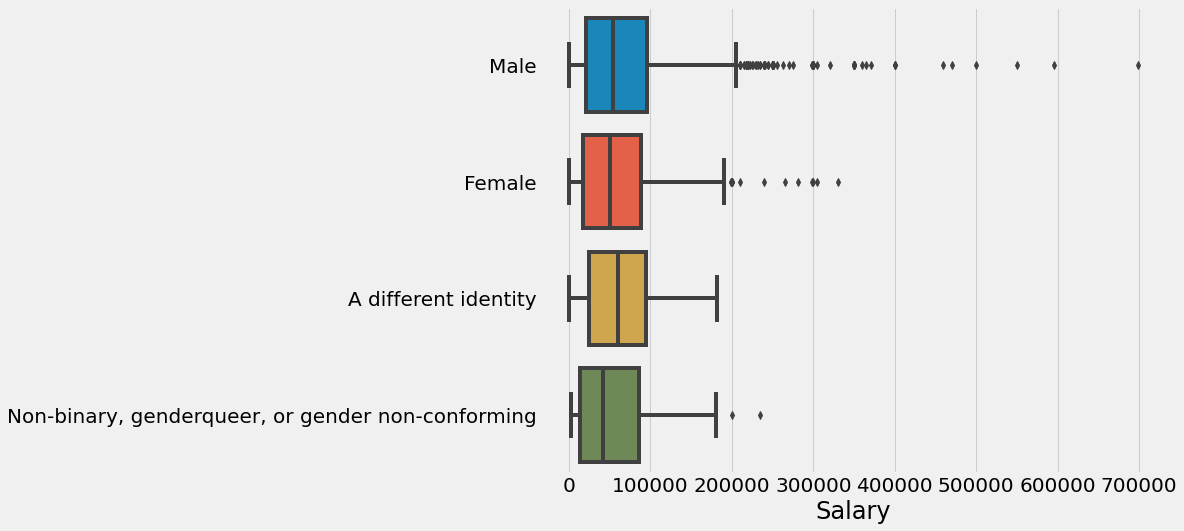

In [10]:
plt.subplots(figsize=(10,8))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)
plt.ylabel('')
plt.show()

남성의 급여는 다른 것들보다 높아 보인다.

### Age

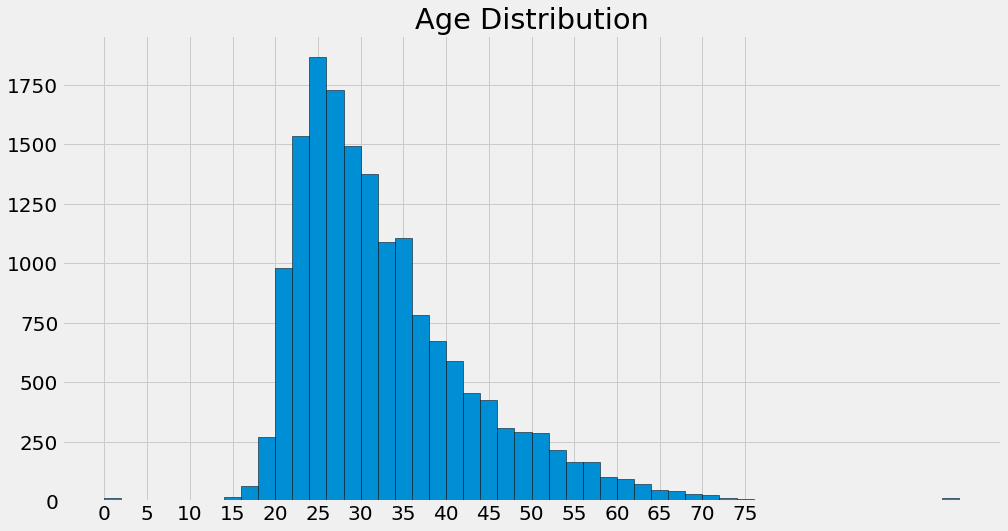

In [11]:
plt.subplots(figsize=(15,8))
response['Age'].hist(bins=50, edgecolor='black')
plt.xticks(list(range(0,80,5)))
plt.title('Age Distribution')
plt.show()

응답자들은 25~35세의 연령대인 젊은 층이다.

### Profession & Major

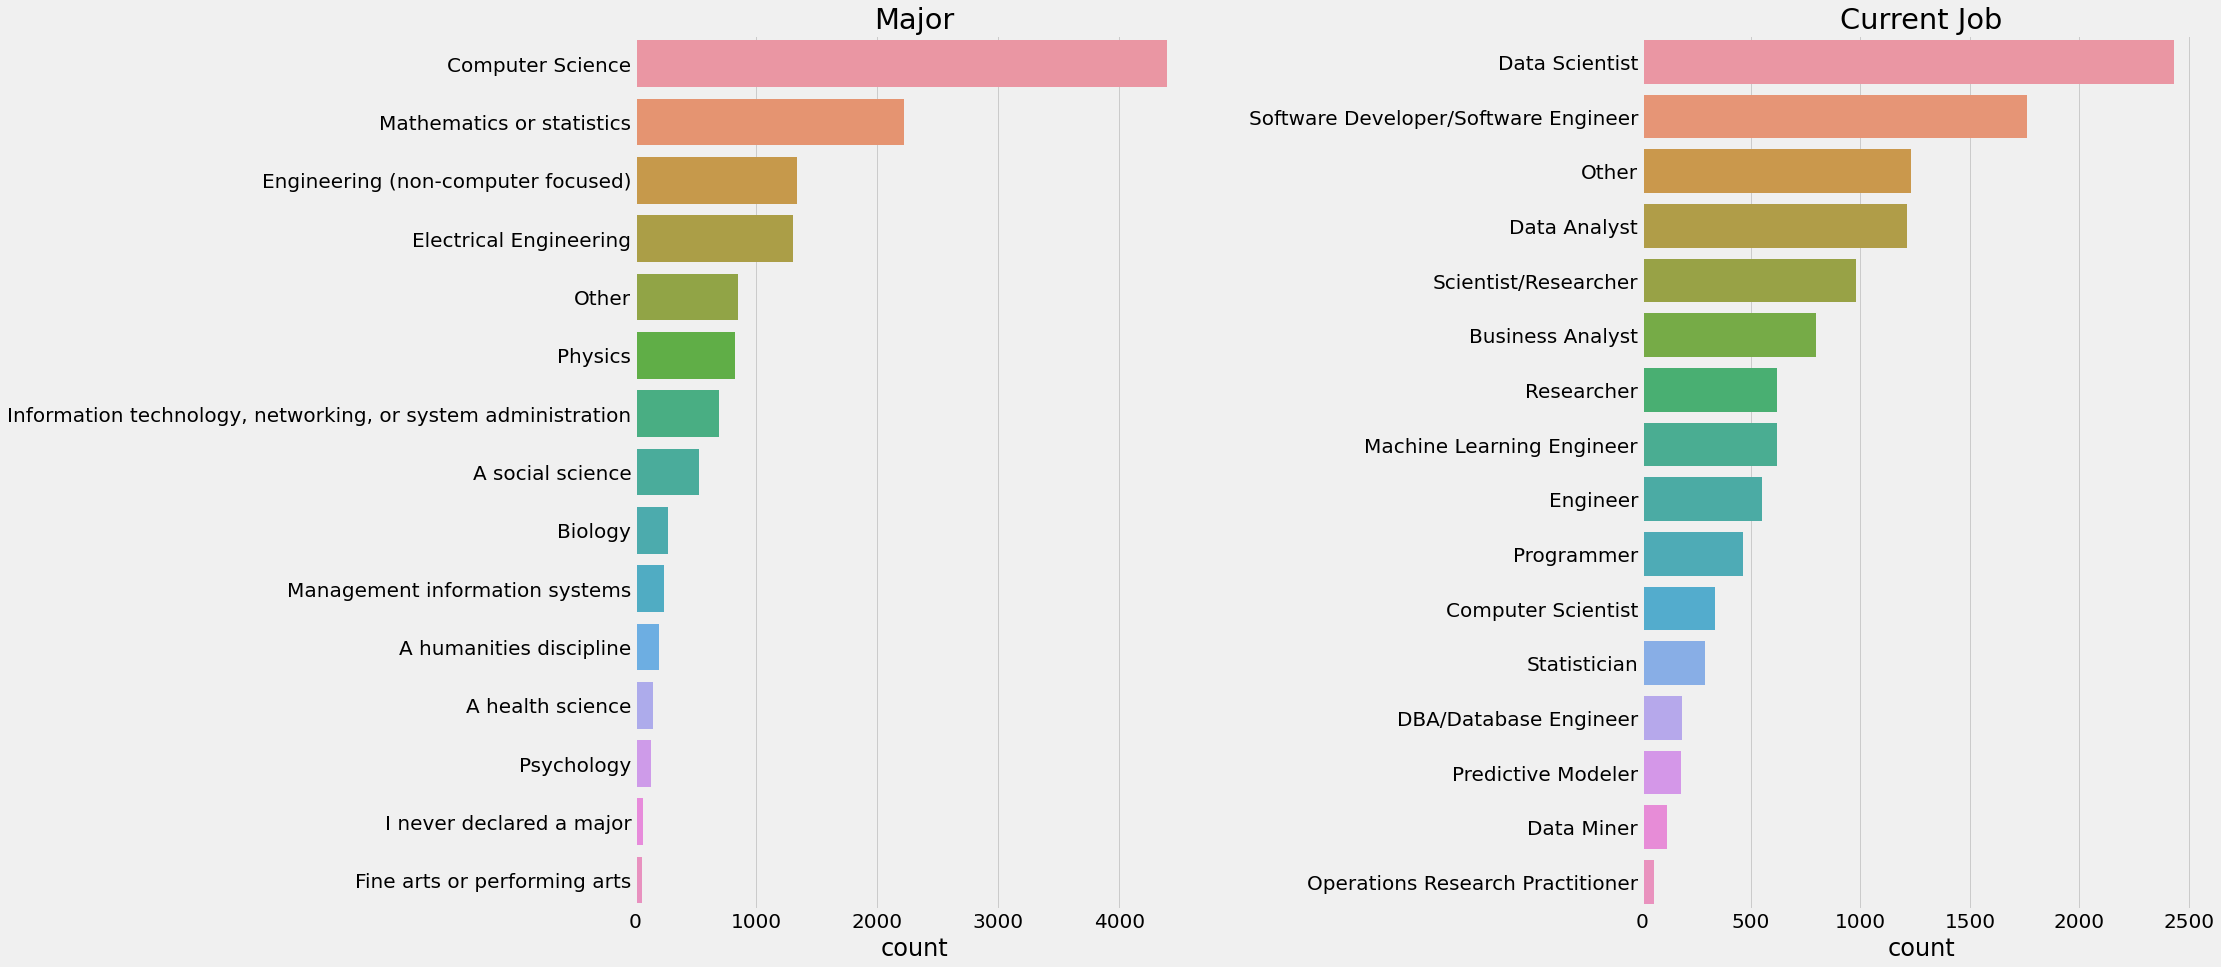

In [12]:
f, ax = plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=response['MajorSelect'], ax=ax[0], order=response['MajorSelect'].value_counts().index)
ax[0].set_title('Major')
ax[0].set_ylabel('')

sns.countplot(y=response['CurrentJobTitleSelect'], ax=ax[1], order=response['CurrentJobTitleSelect'].value_counts().index)
ax[1].set_title('Current Job')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()

데이터 사이언스와 머신러닝은 거의 모든 산업에서 사용된다. 좌측 그래프에서 명백히 보인다. 물리학, 생물학 등 다양한 관심 분야를 가진 사람들이 데이터에 대한 이해를 위해 차지하고 있다. 우측 그래프는 응답자의 현재 직업을 보여준다. 응답자 대다수는 데이터 사이언티스트다. 그러나 조사 데이터이기 때문에 모호한 반응이 많을 수 있다. 나중에 실제 데이터 사이언티스트 또는 데이터 사이언티스트라고 자체 선언한 사람들인지를 확인할 것이다.

### compensation By Job TItle

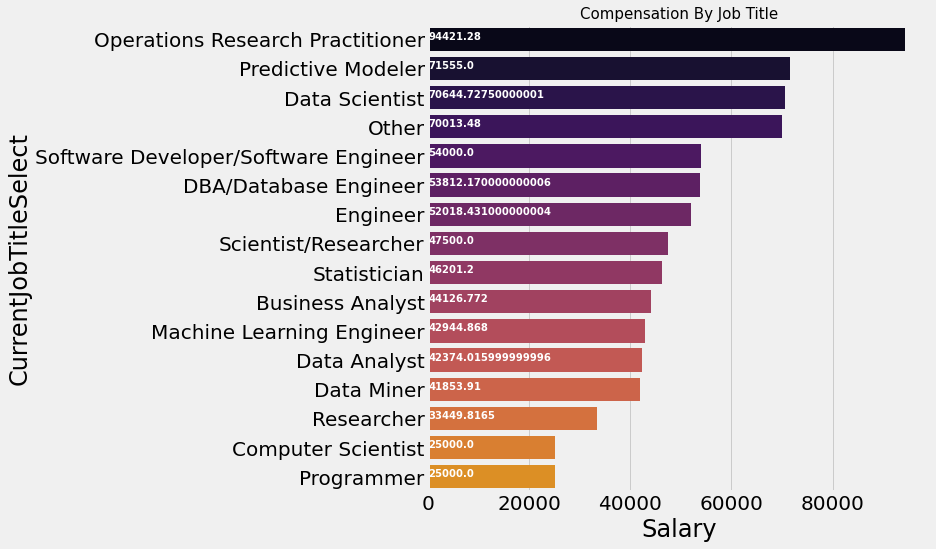

In [13]:
sal_job = salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary',ascending=False)
ax = sns.barplot(sal_job.Salary,sal_job.index, palette=sns.color_palette('inferno',20))
plt.title('Compensation By Job Title',size=15)
for i, v in enumerate(sal_job.Salary): 
    ax.text(.5, i, v, fontsize=10, color='white', weight='bold')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

### Machine Learning

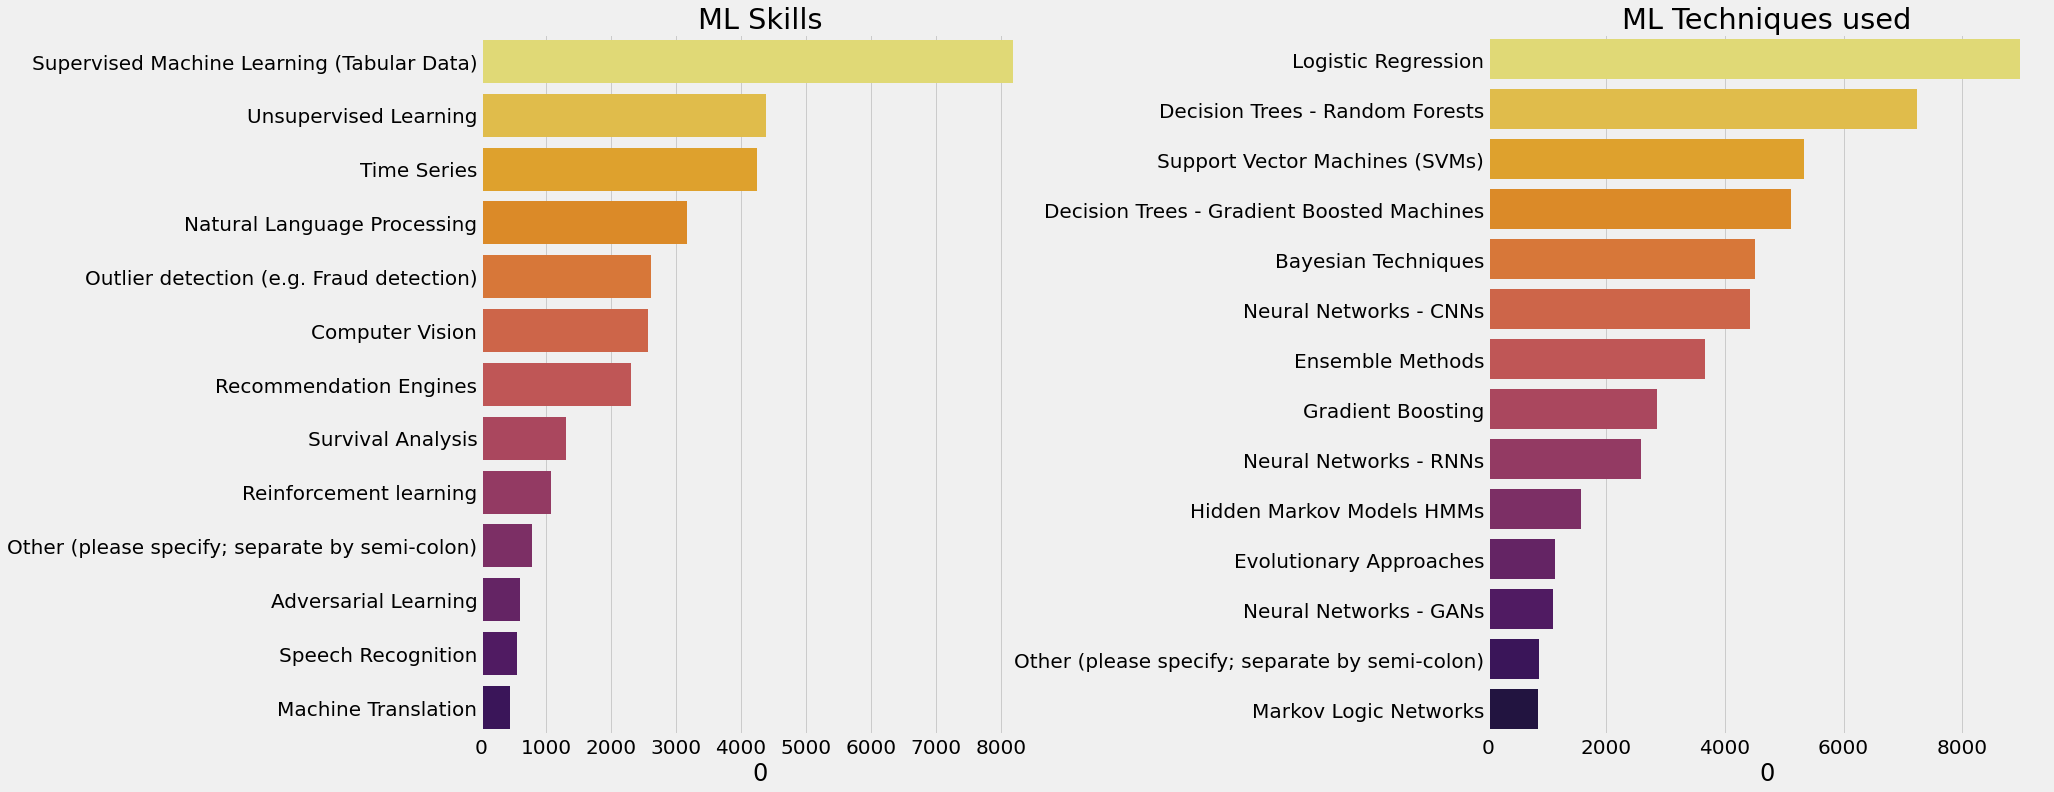

In [14]:
f,ax = plt.subplots(1,2,figsize=(25,12))
skills = response['MLSkillsSelect'].str.split(',')
skills_set = []
for i in skills.dropna():
    skills_set.extend(i)
plt1 = pd.Series(skills_set).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0], plt1.index, ax=ax[0], palette=sns.color_palette('inferno_r',15))
ax[0].set_title('ML Skills')

tech = response['MLTechniquesSelect'].str.split(',')
techniques = []
for i in tech.dropna():
    techniques.extend(i)
plt1 = pd.Series(techniques).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[1].set_title('ML Techniques used')
plt.subplots_adjust(wspace=0.8)
plt.show()

대부분의 응답자가 지도학습에 대해 연구하고 있고, 그 중에서도 로지스틱 회귀가 가장 선호되는 것으로 나타났다. 모든 분류 도메인에 가장 적합한 알고리즘은 없다. 특정 도메인에 대한 하나의 알고리즘을 선택하는 방법은 train 데이터에 대한 교차검증을 사용하는 것이다.

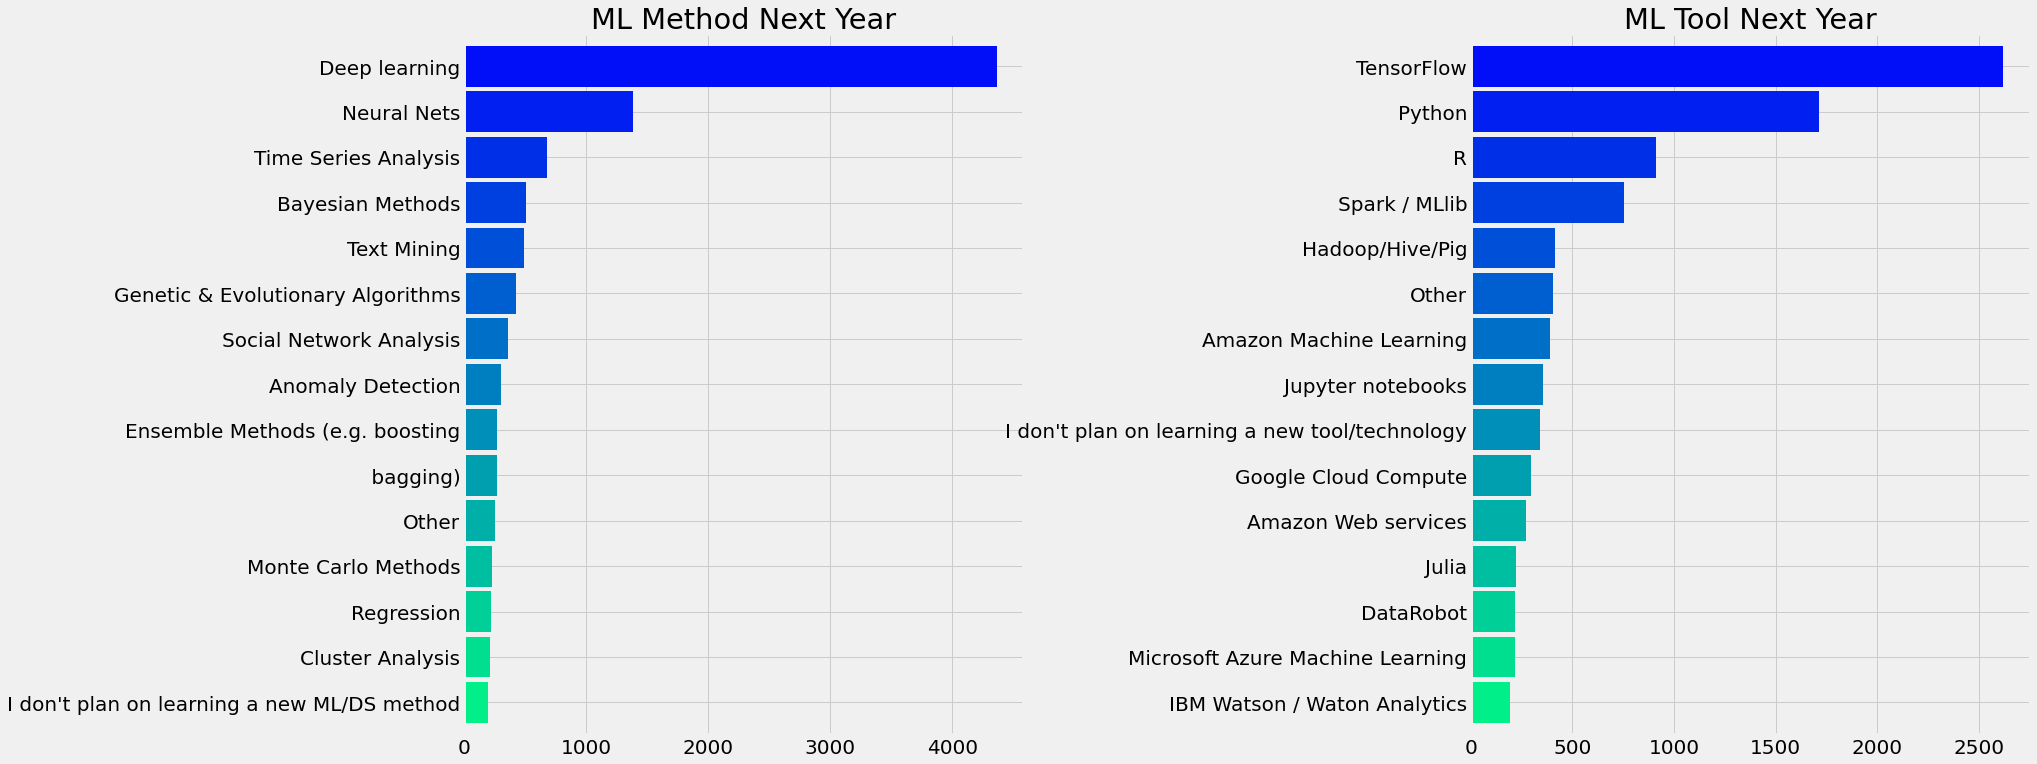

In [15]:
f,ax = plt.subplots(1,2,figsize=(25,12))
ml_nxt = response['MLMethodNextYearSelect'].str.split(',')
nxt_year = []
for i in ml_nxt.dropna():
    nxt_year.extend(i)
pd.Series(nxt_year).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[0])

tool = response['MLToolNextYearSelect'].str.split(',')
tool_nxt = []
for i in tool.dropna():
    tool_nxt.extend(i)
pd.Series(tool_nxt).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r',15),ax=ax[1])
plt.subplots_adjust(wspace=0.8)
ax[0].set_title('ML Method Next Year')
ax[1].set_title('ML Tool Next Year')
plt.show()

다음 해에는 딥러닝 연습자 수가 많아질 것이 분명하다. 딥러닝과 신경망 또는 간단히 말해 AI는 다음 해 가장 인기있는 화제다. 또한 도구의 경우, 파이썬은 R보다 더 선호된다. Spark와 Hadoop과 같은 빅데이터 도구 또한 향후 몇 년 동안 상당한 점유율을 차지하고 있다.

### Best Platforms to Learn

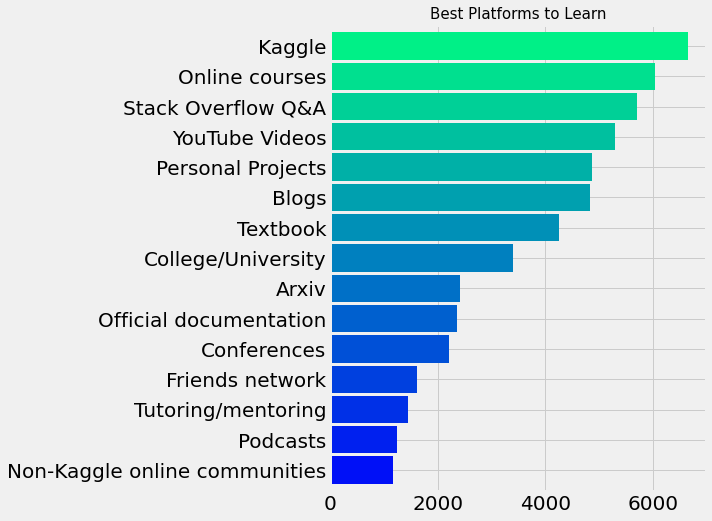

In [16]:
plt.subplots(figsize=(6,8))
learn = response['LearningPlatformSelect'].str.split(',')
platform = []
for i in learn.dropna():
    platform.extend(i)
pd.Series(platform).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter',15))
plt.title('Best Platforms to Learn', size=15)
plt.show()

Kaggle은 데이터 사이언스 학습시 가장 많이 찾는 곳이다. 다음은 온라인 과정(예:MOOC, coursera)이다. 비슷하게 Siraj Raval 등과 같은 유튜브 채널은 무료로 공부할 수 있는 매체를 제공한다. 이 모든 매체는 교과서보다 많이 선택되었다. 교과서 내용이 종종 제한되어있거나, 사람들이 영상으로 보고 배우는 것을 더 좋아하기 때문일 것이다.

### Hardware Used

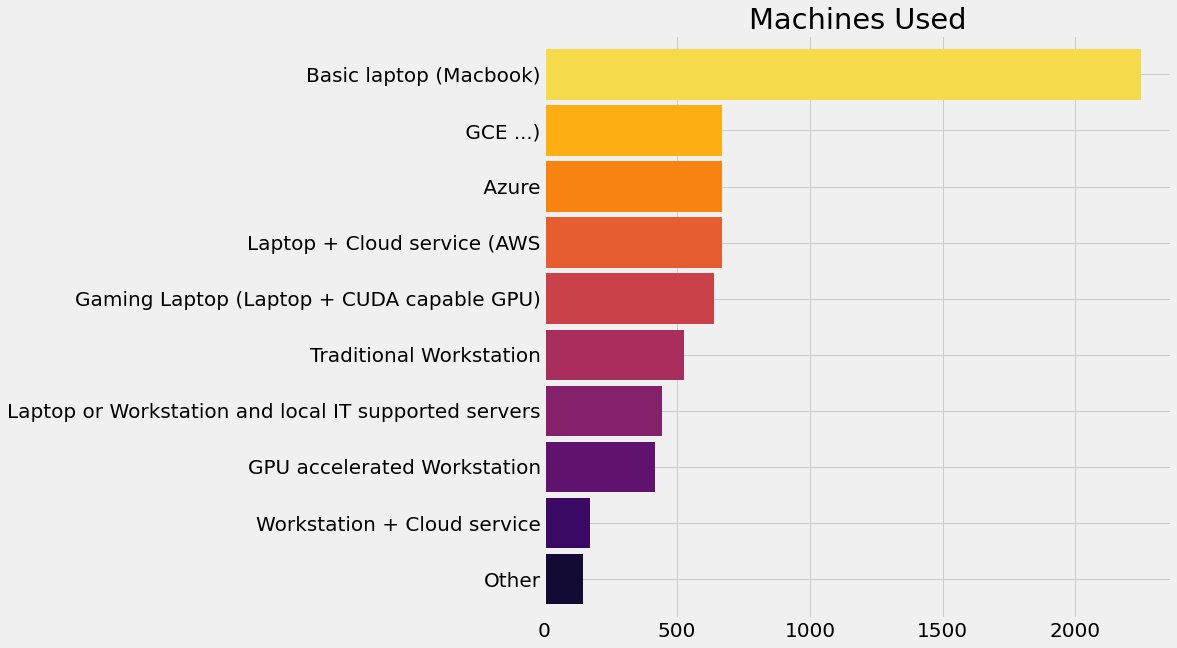

In [29]:
plt.subplots(figsize=(10,10))
hard = response['HardwarePersonalProjectsSelect'].str.split(',')
hardware = []
for i in hard.dropna():
    hardware.extend(i)
pd.Series(hardware).value_counts().sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('inferno',10))
plt.title('Machines Used')
plt.show()

응답자 대다수가 25세 이하이므로, 기본 노트북은 직장에서 가장 많이 사용되는 기계다.

### Where do I get Datasets From?

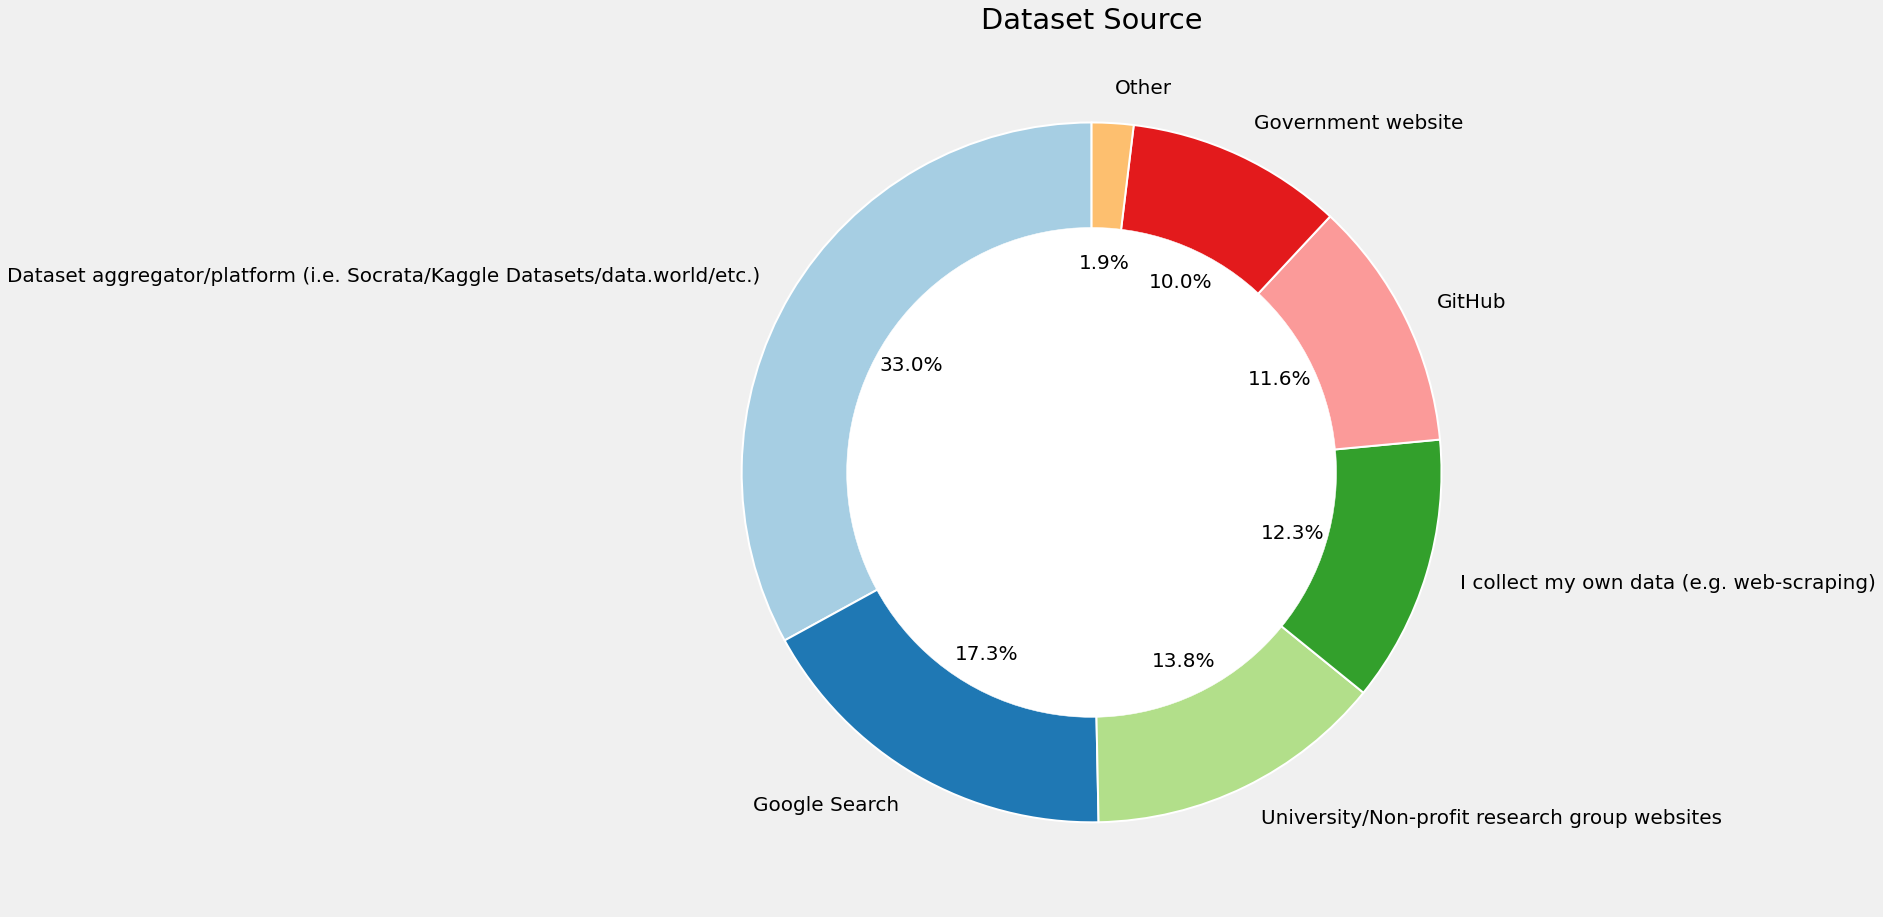

In [31]:
plt.subplots(figsize=(15,15))
data=response['PublicDatasetsSelect'].str.split(',')
dataset=[]
for i in data.dropna():
    dataset.extend(i)
pd.Series(dataset).value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Paired',10),startangle=90,wedgeprops={'linewidth':2,'edgecolor':'white'})
plt.title('Dataset Source')
my_circle = plt.Circle((0,0),0.7,color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

### Code Sharing

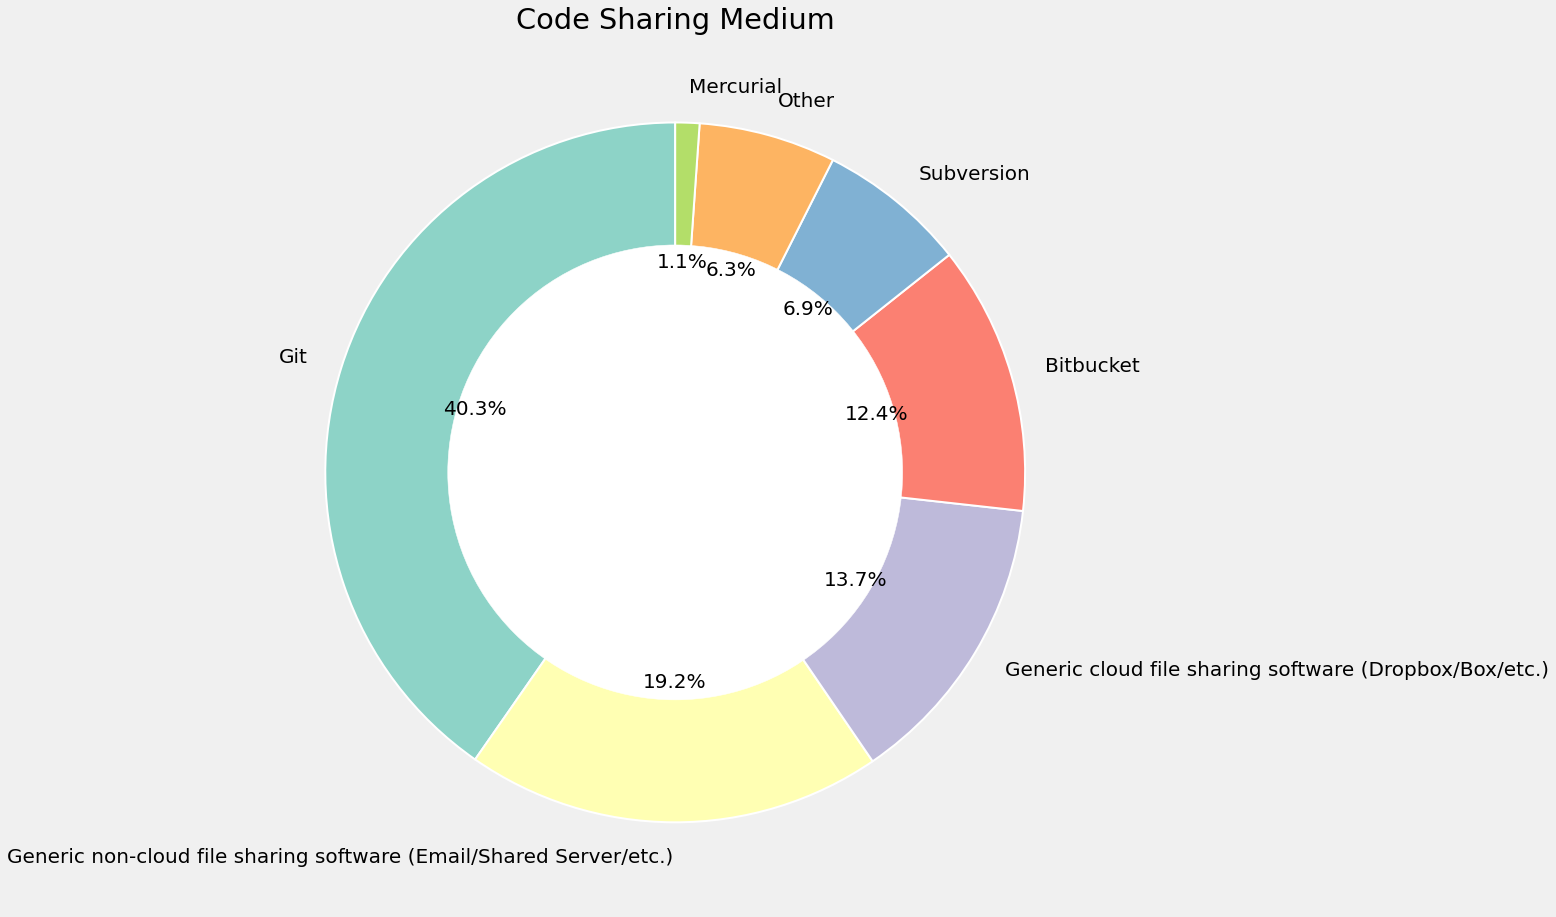

In [32]:
plt.subplots(figsize=(15,15))
code = response['WorkCodeSharing'].str.split(',')
code_share = []
for i in code.dropna():
    code_share.extend(i)
pd.Series(code_share).value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3',10),startangle=90,wedgeprops={'linewidth':2,'edgecolor':'white'})
plt.title('Code Sharing Medium')
my_circle = plt.Circle((0,0), 0.65, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Github는 코드와 프로젝트 공유를 위해 가장 많이 사용되는 플랫폼이다.

### Challenges in Data Scince

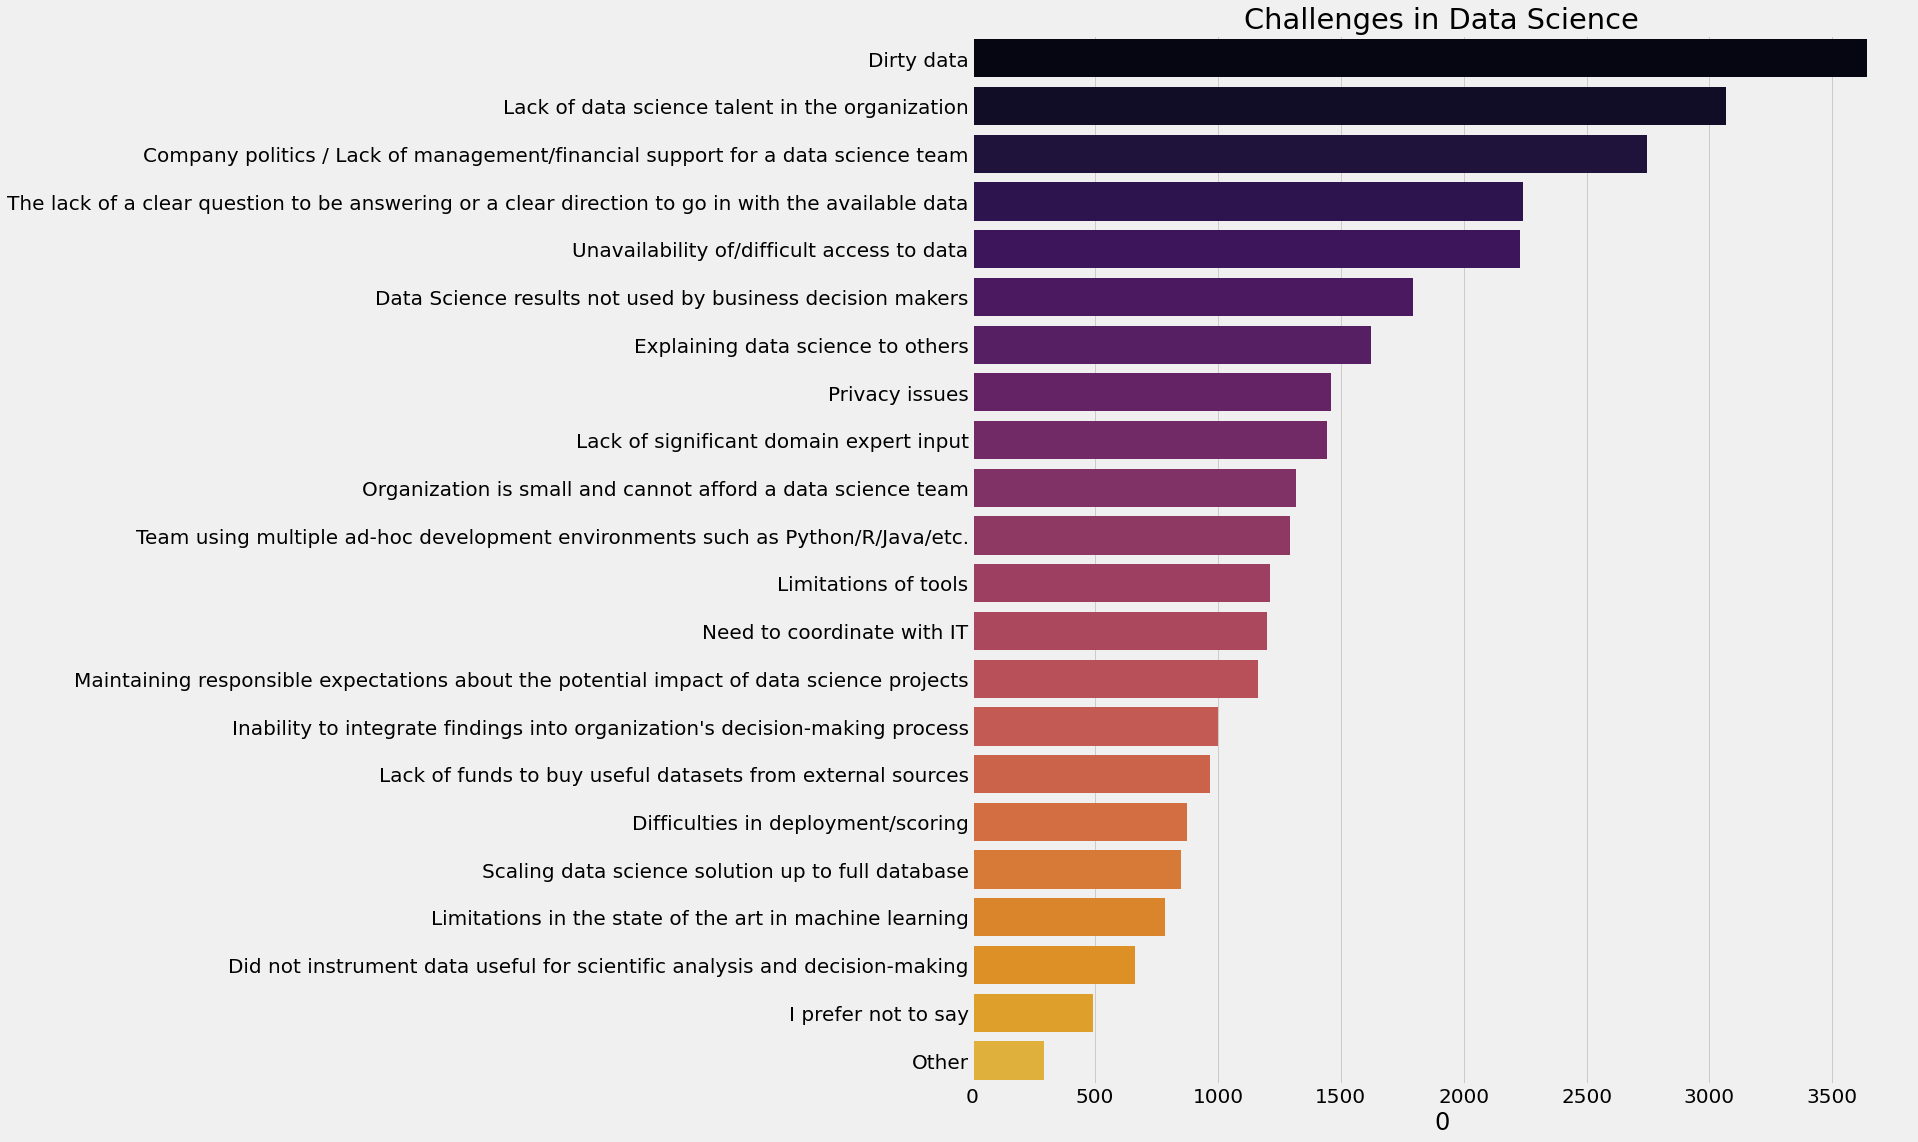

In [34]:
plt.subplots(figsize=(15,18))
challenge = response['WorkChallengesSelect'].str.split(',')
challenges = []
for i in challenge.dropna():
    challenges.extend(i)
plt1 = pd.Series(challenges).value_counts().sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,palette=sns.color_palette('inferno',25))
plt.title('Challenges in Data Science')
plt.show()

데이터 사이언스의 주요 과젠느 적절한 데이터를 얻는 것이다. 그래프는 더티 데이터가 가장 큰 문제임을 보여준다. 더티 데이터란, 오류가 포함된 데이터베이스 레코드이다. 잘못된 데이터는 중복 레코드, 불완전하거나 오래된 데이터, 서로 다른 시스템에서 레코드 필드를 잘못 분석하는 등 여러가지 요인으로 인해 발생할 수 있다.

다른 주요 과제는 데이터 사이언스와 머신러닝 재능 부족, 데이터 수집의 어려움과 도구 부족이다. 

### Job Satisfaction

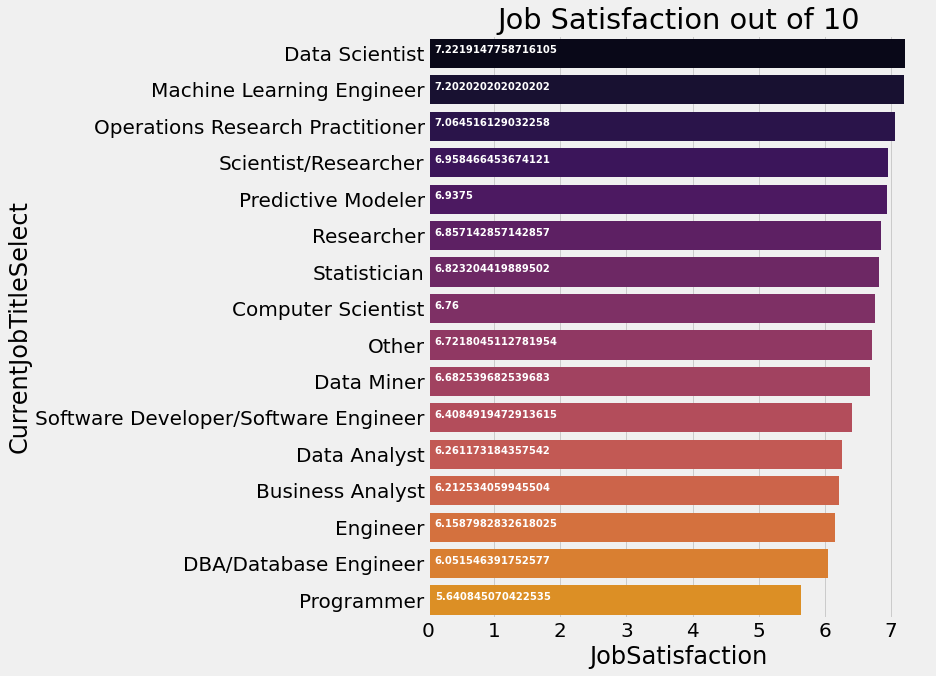

In [37]:
satisfy = response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction'] = satisfy['JobSatisfaction'].astype(int)
satisfy_job = satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
ax = sns.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction, palette=sns.color_palette('inferno',20))
fig = plt.gcf()
fig.set_size_inches(8,10)
for i, v in enumerate(satisfy_job.JobSatisfaction):
    ax.text(.1, i, v, fontsize=10, color='white', weight='bold')
plt.title('Job Satisfaction out of 10')
plt.show()

데이터 사이언티스트와 머신러닝 엔지니어는 가장 만족도가 높은 사람들이고, 반면 프로그래머는 만족도가 가장 낮다. 하지만 여기서 주목해야할 점은 컴퓨터 사이언티스트가 프로그래머보다 낮은 연봉을 받아도 직업 만족도가 높다는 것이다. 따라서 급여만이 기준이나 직업 만족도가 아니다.

#### Job Satisfication By Country

In [40]:
satisfy = response.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'1','I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'],inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job = satisfy.groupby(['Country'])['JobSatisfaction'].mean().sort_values(ascending=True).to_frame()
data = [dict(type = 'choropleth', autocolorscale = False,
             colorscale = 'Viridis', reversescale = True,
             showscale = True, locations = satisfy_job.index,
             z = satisfy_job['JobSatisfaction'], locationmode = 'country names',
             text = satisfy_job['JobSatisfaction'], marker = dict(line = dict(color = 'rgb(200,200,200)', width = 0.5)),colorbar = dict(autotick = True, tickprefix = '', title = 'Satisfaction'))]
layout = dict(title = 'Job Satisfaction By Country',
              geo = dict(showframe = True,showocean = True,oceancolor = 'rgb(0,0,255)',projection = dict(type = 'chloropleth',),
                         lonaxis =  dict(showgrid = False,gridcolor = 'rgb(102, 102, 102)'),
                         lataxis = dict(showgrid = False,gridcolor = 'rgb(102, 102, 102)')))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2010')

대부분의 국가에서 평균 직무 만족도는 6~7.5다. 일본(약 14시간 일하는 곳)과 중국에서는 더 낮다. 스웨덴과 멕시코와 같은 국가에서 더 높다.

### Python vs R or (Batman vs Superman)

In [42]:
resp = response.dropna(subset=['WorkToolsSelect'])
resp = resp.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')
python = resp[(resp['WorkToolsSelect'].str.contains('Python')) & (~resp['WorkToolsSelect'].str.contains('R'))]
R = resp[(~resp['WorkToolsSelect'].str.contains('Python')) & (resp['WorkToolsSelect'].str.contains('R'))]
both = resp[(resp['WorkToolsSelect'].str.contains('Python')) & (resp['WorkToolsSelect'].str.contains('R'))]

#### Recommended Language For Begineers

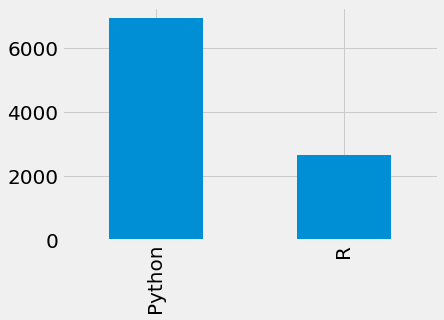

In [43]:
response['LanguageRecommendationSelect'].value_counts()[:2].plot.bar()
plt.show()

분명히 파이썬은 초보자들에게 권장되는 언어다. 그 이유는 간단한 영어 구문과 범용 기능 때문일 수 있다.

#### Recommendation By Python and R users

In [52]:
labels1=python['LanguageRecommendationSelect'].value_counts()[:5].index
sizes1=python['LanguageRecommendationSelect'].value_counts()[:5].values

labels2=R['LanguageRecommendationSelect'].value_counts()[:5].index
sizes2=R['LanguageRecommendationSelect'].value_counts()[:5].values


fig = {
  "data": [
    {
      "values": sizes1,
      "labels": labels1,
      "domain": {"x": [0, .48]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": sizes2 ,
      "labels": labels2,
      #"text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.54, 1]},
      "name": "Language",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Language Recommended By Python and R users",
        "annotations": [
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "Python",
                "x": 0.17,
                "y": 0.5
            },
            {
                "font": {
                    "size": 30
                },
                "showarrow": False,
                "text": "R",
                "x": 0.79,
                "y": 0.5}]}}
py.iplot(fig, filename='donut')

흥미로운 발견이다. 약 91.6%의 파이썬 사용자는 파이썬을 초보자를 위한 첫 언어로 추천하는 반면, 67.2%의 R 사용자만이 R을 첫 언어로 추천한다. 또한 20.6%의 R 사용자가 python을 추천하지만 1.68%의 Python 사용자만이 R을 추천한다. 또한 두 사용자 모두 SQL, Matlab, C/C++을 권장한다. 상위 5개 추천 언어만 고려했으므로 모두 고려한다면 비율이 달라질 것이다. 하지만 차이는 2~3%에 불과하다.

##### Necessary or Not?

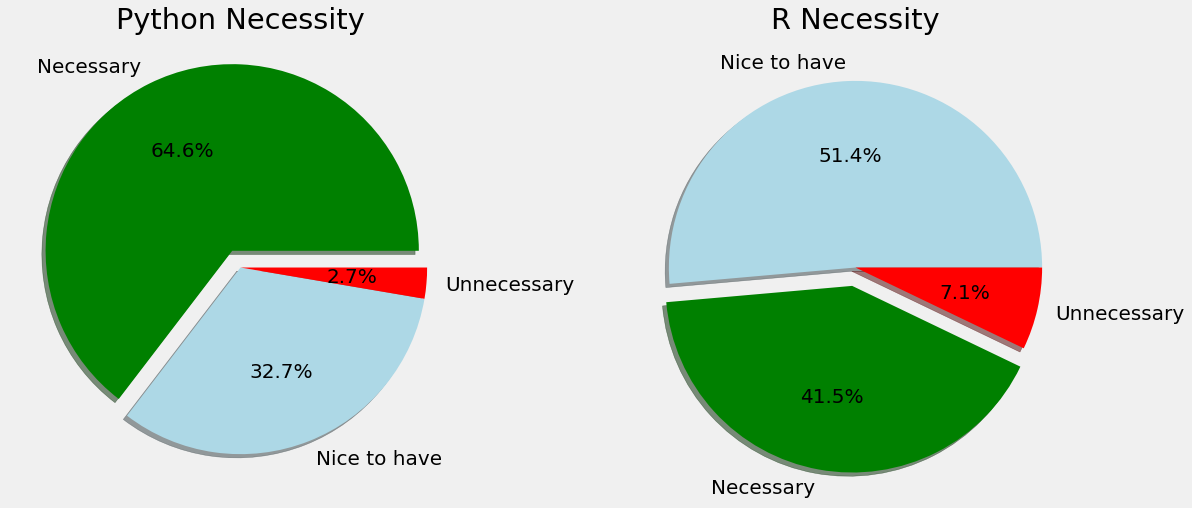

In [53]:
f,ax = plt.subplots(1,2,figsize=(18,8))
response['JobSkillImportancePython'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True,colors=['g','lightblue','r'])
ax[0].set_title('Python Necessity')
ax[0].set_ylabel('')

response['JobSkillImportanceR'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',explode=[0,0.1,0],shadow=True,colors=['lightblue','g','r'])
ax[1].set_title('R Necessity')
ax[1].set_ylabel('')
plt.show()

#### Number of Users By Language

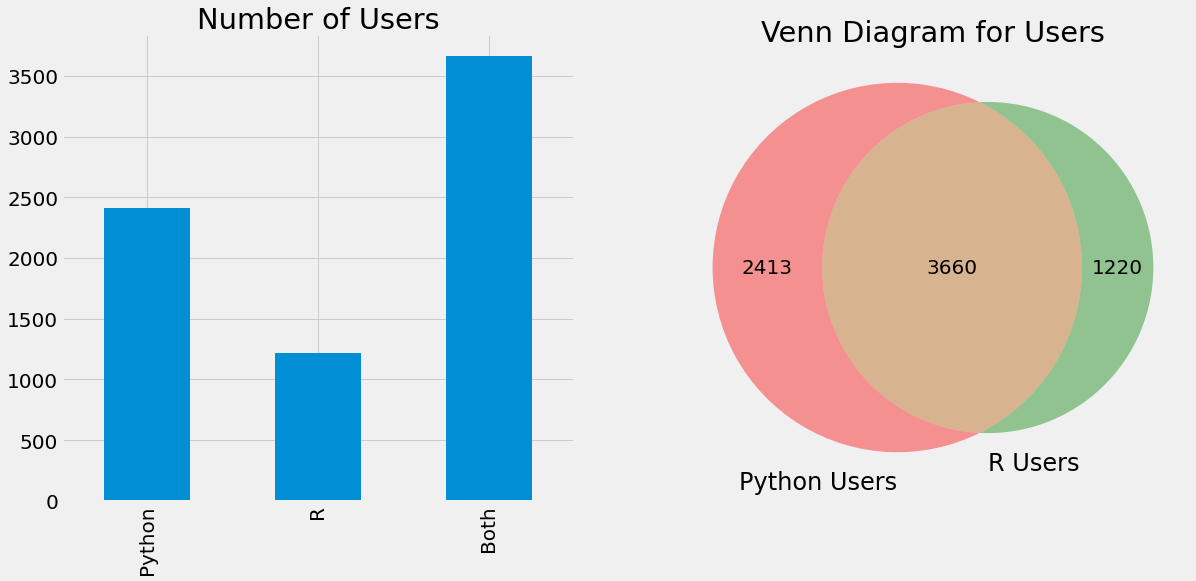

In [54]:
f,ax = plt.subplots(1,2,figsize=(18,8))
pd.Series([python.shape[0],R.shape[0],both.shape[0]],index=['Python','R','Both']).plot.bar(ax=ax[0])
ax[0].set_title('Number of Users')
venn2(subsets = (python.shape[0],R.shape[0],both.shape[0]), set_labels = ('Python Users', 'R Users'))
plt.title('Venn Diagram for Users')
plt.show()

python 사용자 수는 R 사용자 수보다 확실히 많다. 그러나 두 언어를 모두 알고있는 사용자가 더 많다. 이러한 응답은 언어와 도구에 대한 지식이 있는 경향이 있으므로 기존 데이터 사이언티스트들의 반응일 수 있다.

### Compensation

In [56]:
py_sal = (pd.to_numeric(python['CompensationAmount'].dropna())*python['exchangeRate']).dropna()
py_sal = py_sal[py_sal<1000000]
R_sal = (pd.to_numeric(R['CompensationAmount'].dropna())*R['exchangeRate']).dropna()
R_sal = R_sal[R_sal<1000000]
both_sal = (pd.to_numeric(both['CompensationAmount'].dropna())*both['exchangeRate']).dropna()
both_sal = both_sal[both_sal<1000000]

trying = pd.DataFrame([py_sal, R_sal, both_sal])
trying = trying.transpose()
trying.columns = ['Python','R','Both']

print('Median Salary For Individual using Python :', trying['Python'].median())
print('Median Salary For Individual using R :', trying['R'].median())
print('Median Salary For Individual knowing both languages :', trying['Both'].median())

Median Salary For Individual using Python : 48725.600000000006
Median Salary For Individual using R : 48422.0
Median Salary For Individual knowing both languages : 59791.3


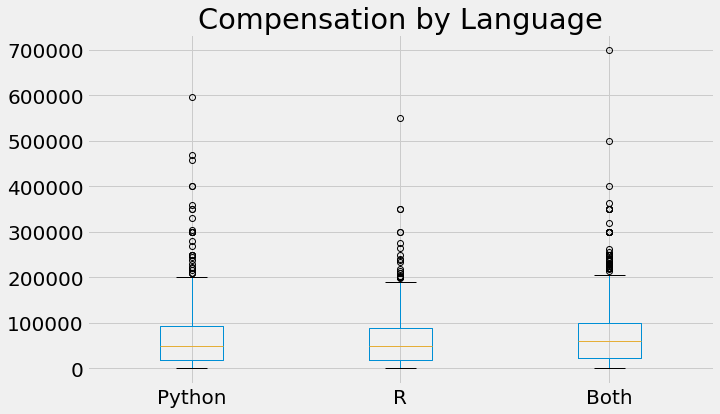

In [57]:
trying.plot.box()
plt.title('Compensation by Language')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

파이썬 사용자는 R에 비해 급여 중위수가 약간 더 높다. 하지만 이 두 언어를 아는 사람들은 두 언어에 비해 연봉 중위수가 꽤 높다.

#### Language Used by Professinals

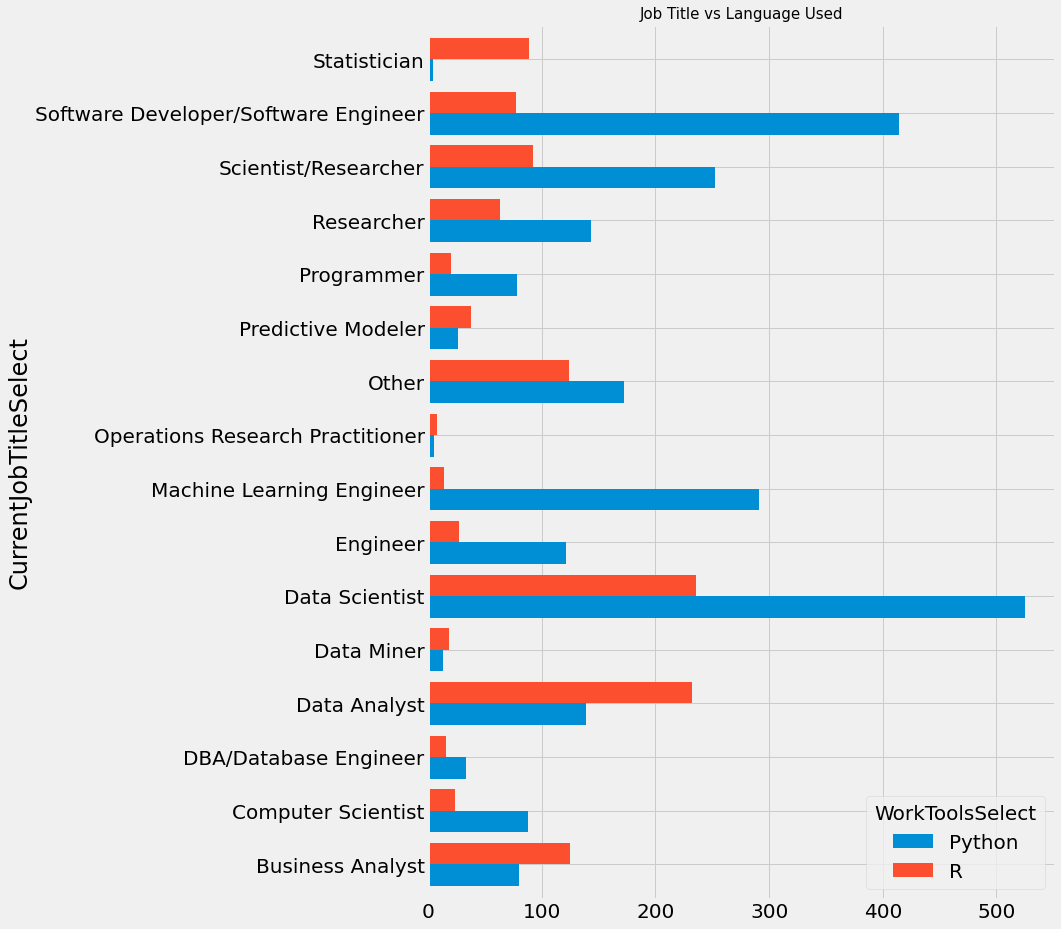

In [58]:
py1 = python.copy()
r = R.copy()
py1['WorkToolsSelect'] = 'Python'
r['WorkToolsSelect'] = 'R'
r_vs_py = pd.concat([py1,r])
r_vs_py = r_vs_py.groupby(['CurrentJobTitleSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('CurrentJobTitleSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Title vs Language Used',size=15)
plt.show()

전에 말했듯 시각화에서 R이 python을 이긴다. 따라서 그래프와 시각화가 매우 중요한 역할을 하는 데이터 분석가, 비즈니스 분석가와 같은 사람들은 python 보다 R을 선호한다. 마찬가지로 거의 90%의 통계학자가 R을 사용한다. 또한 python은 머신러닝에서 더 우수하므로 머신러닝 엔지니어, 데이터 사이언티스트, DBA, 프로그래머와 같은 사람들은 R보다 python을 선호한다.

따라서 데이터 시각화 --> R   나머지 --> Python

참고 : 이 그래프는 전문가가 권장하는 언어가 아니라 전문가가 사용하는 도구다.

#### Job Function vs Language

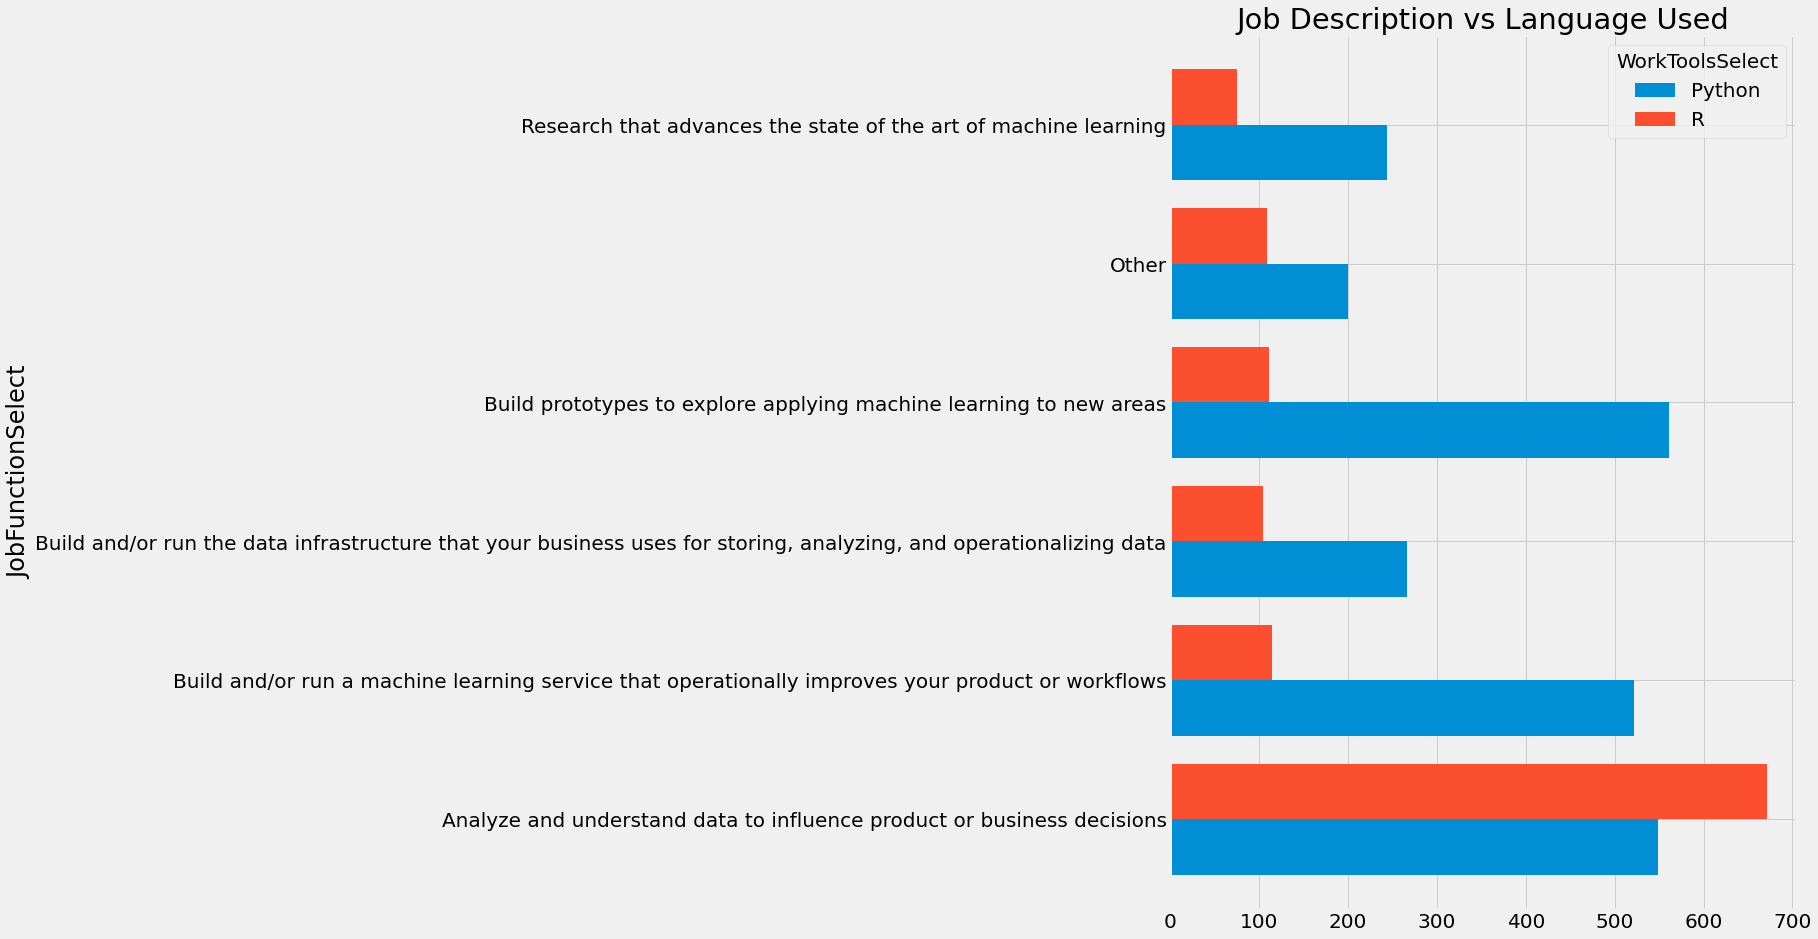

In [59]:
r_vs_py = pd.concat([py1,r])
r_vs_py = r_vs_py.groupby(['JobFunctionSelect','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('JobFunctionSelect','WorkToolsSelect','Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10,15)
plt.title('Job Description vs Language Used')
plt.show()

R은 분석에서 뛰어나지만, Python은 기계학습에서 뛰어나다. 그래프는 R이 순수한 분석에서 영향을 미치지만, 다른 방법으로는 python이 우위에 있다는 것을 보여준다.

#### Tenure vs Language Used

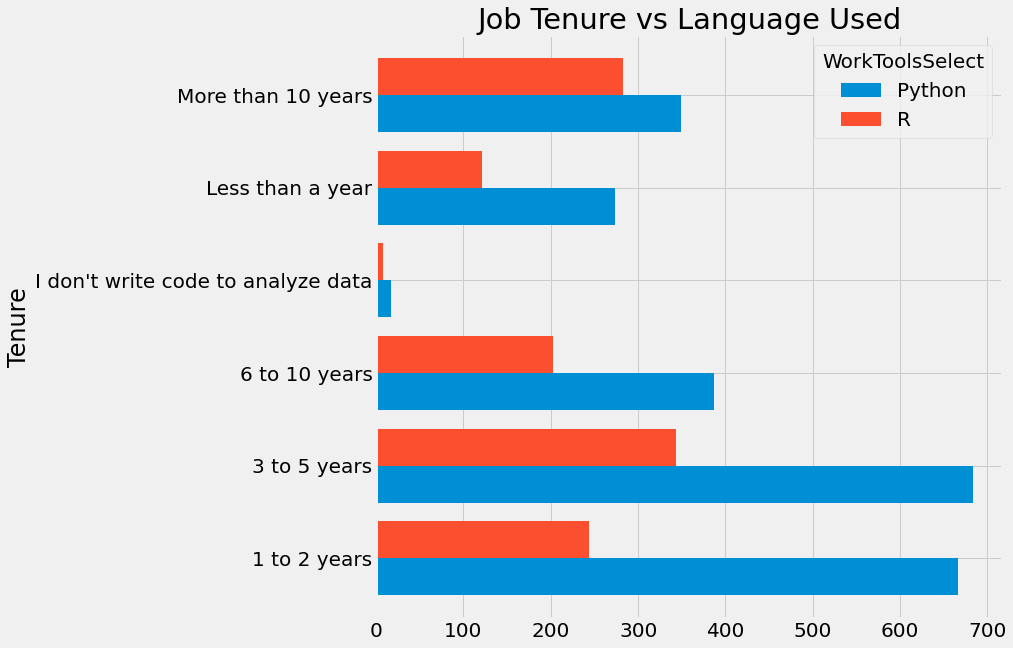

In [60]:
r_vs_py = pd.concat([py1,r])
r_vs_py = r_vs_py.groupby(['Tenure','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('Tenure','WorkToolsSelect','Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Job Tenure vs Language Used')
plt.show()

앞에서 살펴본 것처럼 python은 초보자에게 매우 추천된다. 따라서 python 사용자 비율은 코딩 초기 해에 더 많다. 하지만 코딩 경험이 증가하며 언어간 격차는 몇 년 이상 감소한다.

#### Industry vs Language Used

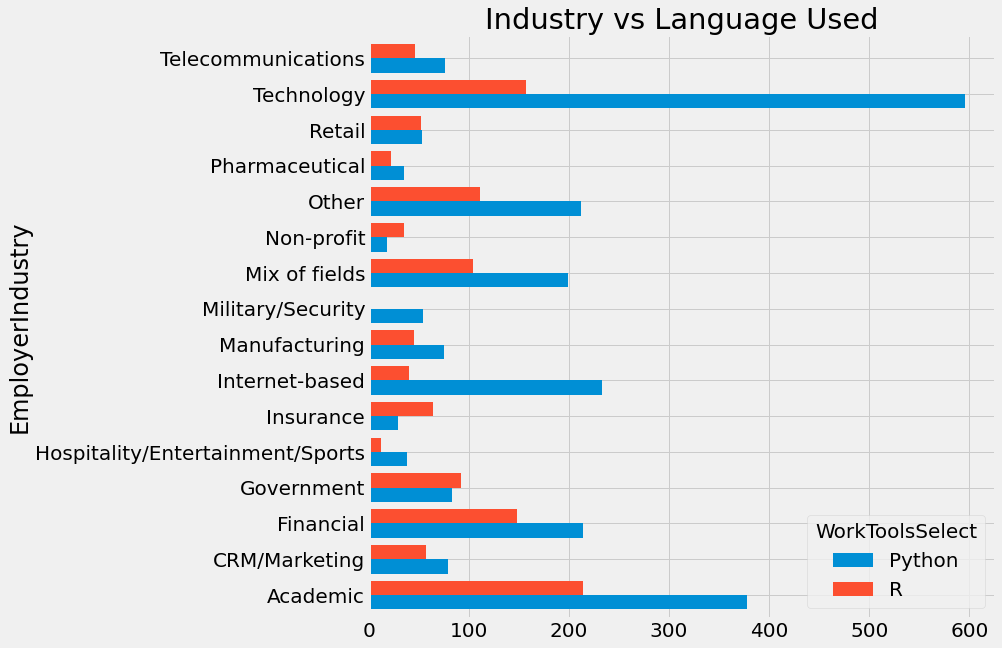

In [61]:
r_vs_py = pd.concat([py1,r])
r_vs_py = r_vs_py.groupby(['EmployerIndustry','WorkToolsSelect'])['Age'].count().to_frame().reset_index()
r_vs_py.pivot('EmployerIndustry','WorkToolsSelect','Age').plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Industry vs Language Used')
plt.show()

#### Common Tools with Python and R

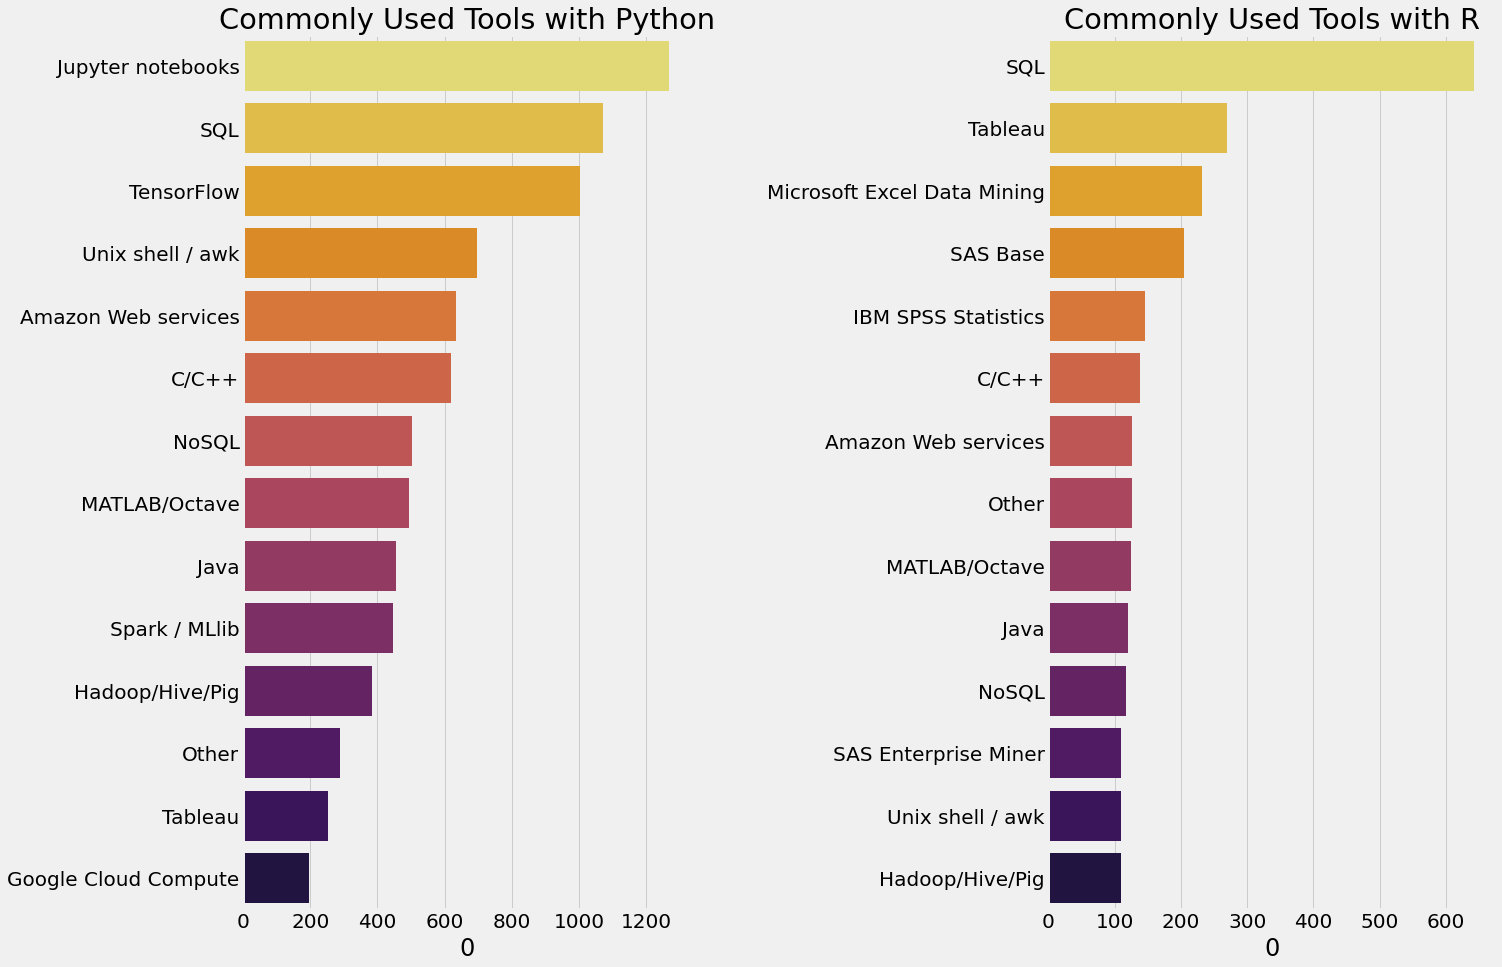

In [62]:
f,ax = plt.subplots(1,2,figsize=(20,15))
py_comp = python['WorkToolsSelect'].str.split(',')
py_comp1 = []
for i in py_comp:
    py_comp1.extend(i)
plt1 = pd.Series(py_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[0],palette=sns.color_palette('inferno_r',15))

R_comp=R['WorkToolsSelect'].str.split(',')
R_comp1=[]
for i in R_comp:
    R_comp1.extend(i)
plt1 = pd.Series(R_comp1).value_counts()[1:15].sort_values(ascending=False).to_frame()
sns.barplot(plt1[0],plt1.index,ax=ax[1],palette=sns.color_palette('inferno_r',15))
ax[0].set_title('Commonly Used Tools with Python')
ax[1].set_title('Commonly Used Tools with R')
plt.subplots_adjust(wspace=0.8)
plt.show()

## Asking the Data Scientists

In [63]:
response['DataScienceIdentitySelect'].value_counts()

No                        5314
Yes                       4257
Sort of (Explain more)    3100
Name: DataScienceIdentitySelect, dtype: int64

전체 응답자 중 약 26%가 스스로를 데이터 사이언티스트라고 생각한다. Sort of는 무슨 뜻일까? 여전히 배우고 있거나 실업자라는 것이다. 지금은 그들을 No로 간주하자.

### Current Job Titles

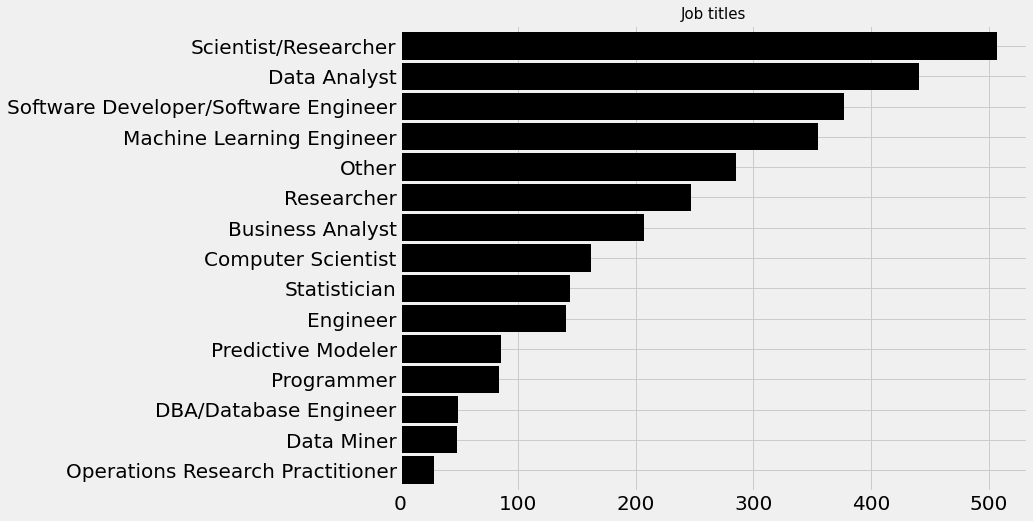

In [66]:
plt.subplots(figsize=(10,8))
scientist = response[response['DataScienceIdentitySelect']=='Yes']
scientist['CurrentJobTitleSelect'].value_counts().sort_values(ascending=True).plot.barh(width=0.9,color='black')
plt.title('Job titles', size=15)
plt.show()

놀랍게도 데이터 사이언티스트 항목이 없다. 데이터 사이언티스트(데이터 사이언티스트로 일하고 있는 사람)라고 CurrentJobTitleSelect를 선택한 사람들이 "본인이 현재 데이터 사이언티스트라고 생각하는가?"에 대한 답을 하지 않아서일 수도 있다. 

데이터 분석가, 데이터 사이언티스트, 머신러닝 전문가, 통계학자 등 직업간 중복되고 공통된 많은 기술이 있다. 따라서 이들은 비슷한 기술을 가지고 있으며 레이블이 같지 않더라도 스스로를 데이터 사이언티스트라고 간주한다. 이제 이전 가정이 참이었는지 확인하자.

In [70]:
true = response[response['CurrentJobTitleSelect']=='Data Scientist']
true.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Male,India,27.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Male,Colombia,34.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Male,Germany,41.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Male,United Kingdom,36.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


사실이었다. CurrentJobTitle가 데이터 사이언티스트인 사람들은 "현재 본인을 데이터 사이언티스트라고 생각하는가?"에 대한 질문에 대답하지 않았다. 따라서 그들은 본인을 실제 데이터 사이언티스트라고 생각하고 있다.

In [71]:
scientist = pd.concat([scientist, true])
scientist['CurrentJobTitleSelect'].shape[0]

6690

따라서 전체 응답자 중 약 40%가 데이터 사이언티스트거나 동일한 기술을 보유하고 있다.